In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('GOOG.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


# Objectives
Our goal is to predict the closing price of the stock for the next 30 days. We will use the past 60 days of data to make the prediction.

We will do analyse using
1. Moving Averages (Exp and Simple)
2. Linear Regression
3. ADF Test


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.set_index('Date', inplace=True)

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


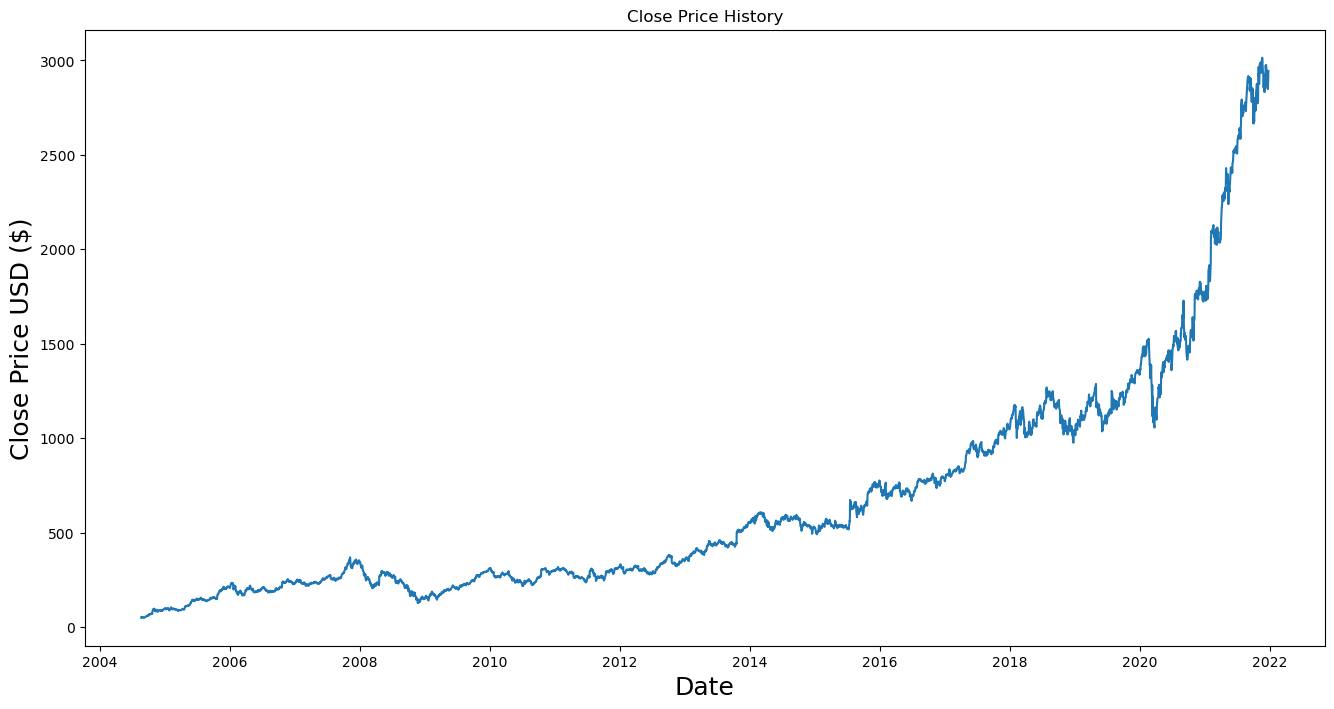

In [11]:
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [17]:
# Moving Average Analysis

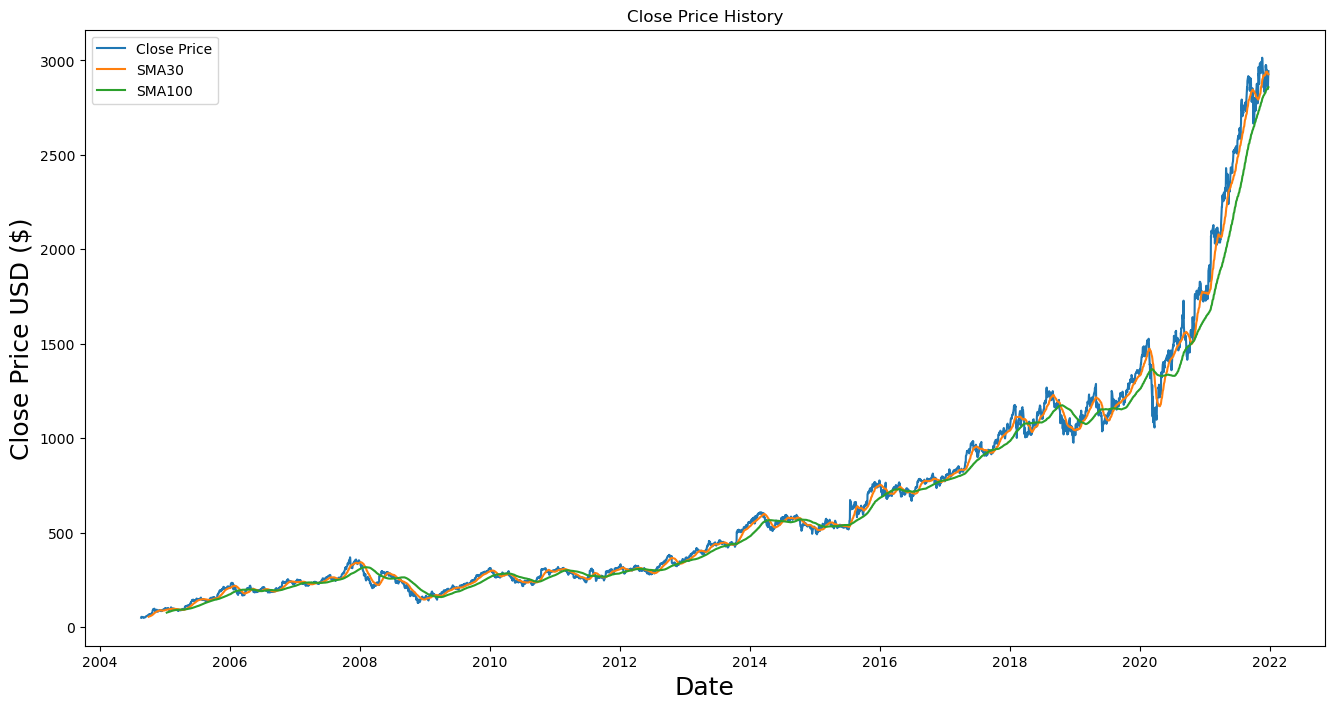

In [20]:
# Simple Moving Average
sma30 = pd.DataFrame()
sma30['Close'] = df['Close'].rolling(window=30).mean()

sma100 = pd.DataFrame()
sma100['Close'] = df['Close'].rolling(window=100).mean()

plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'], label='Close Price')
plt.plot(sma30['Close'], label='SMA30')
plt.plot(sma100['Close'], label='SMA100')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(loc='upper left')
plt.show()

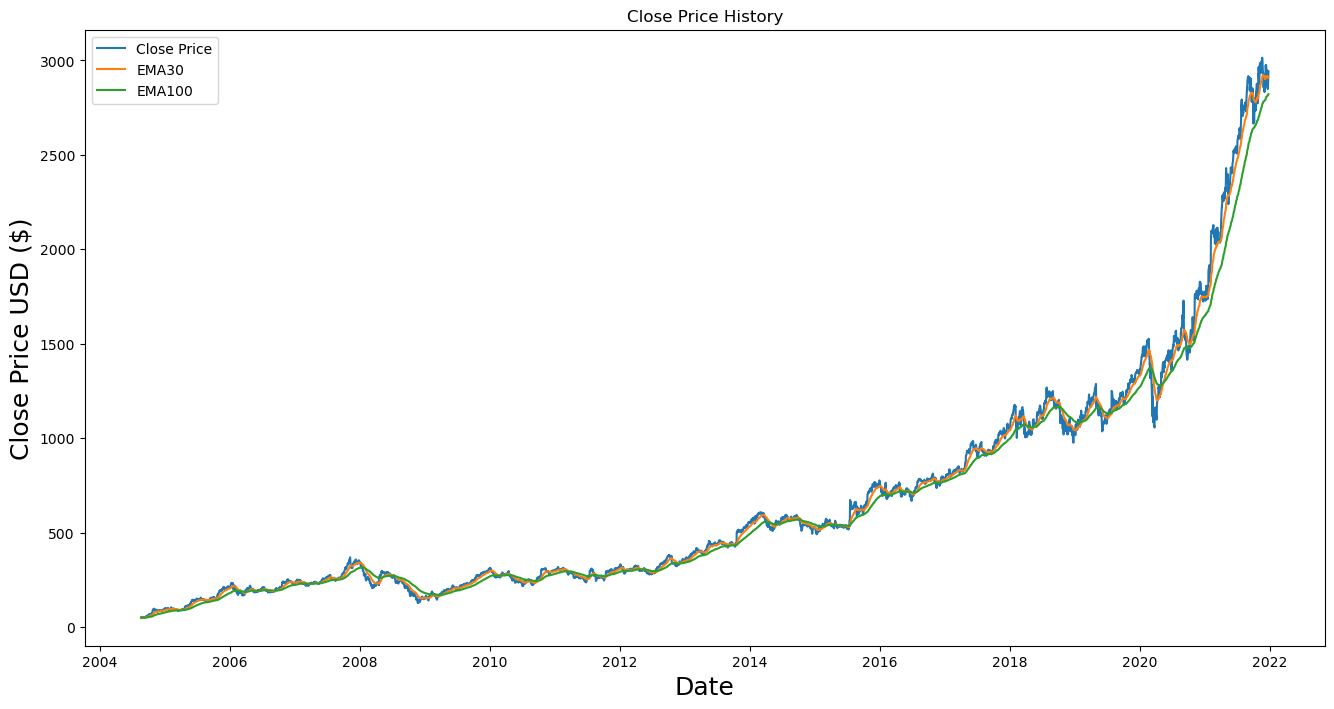

In [21]:
# Exponential Moving Average
ema30 = pd.DataFrame()
ema30['Close'] = df['Close'].ewm(span=30, adjust=False).mean()

ema100 = pd.DataFrame()
ema100['Close'] = df['Close'].ewm(span=100, adjust=False).mean()

plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'], label='Close Price')
plt.plot(ema30['Close'], label='EMA30')
plt.plot(ema100['Close'], label='EMA100')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [30]:
# ADF test
from statsmodels.tsa.stattools import adfuller


def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))


adf_test(df['Close'])

ADF Statistic: 4.812469
p-value: 1.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


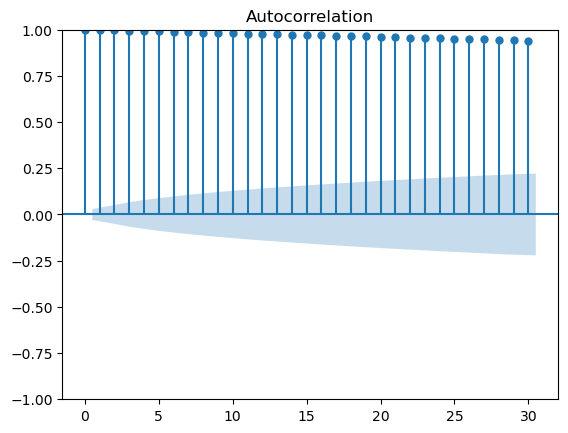

In [31]:
# ACF Plot

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['Close'], lags=30)
plt.show()

# Conclusion from ACF Test
The p-value is greater than 0.05, so we can't reject the null hypothesis. The data is non-stationary.

In [42]:
# Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df['Prediction'] = df['Close']
X = df.drop(['Prediction'], axis=1)
X = X.dropna()
y = df['Prediction'].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_confidence = lr.score(X_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  1.0


In [44]:
# Predicting the next 30 days       

# add more timestamps to the index
new_df = pd.DataFrame(index=range(0, len(df) + 30))
new_df['Date'] = df.index
new_df['Close'] = df['Close']
new_df['Prediction'] = df['Close']
new_df = new_df.drop(['Date'], axis=1)
new_df = new_df.dropna()

# Predict the next 30 days
for i in range(1, 31):
    new_df.loc[len(new_df)] = [np.nan, np.nan]
    new_df['Prediction'][len(new_df) - 1] = lr.predict([[i + len(df)]])

ValueError: Length of values (4339) does not match length of index (4369)